# SVC  Implementation on Wine_Quality Dataset

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing Dataset

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [3]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#checking basic information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Observation:
- There are no missing values in this dataset
- All the features are float type except one and that one is integer type

In [5]:
#checking columns
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
# checking unique values for quality feature
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
#value counts for each unique value of quality feature
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
# statistical desciption of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


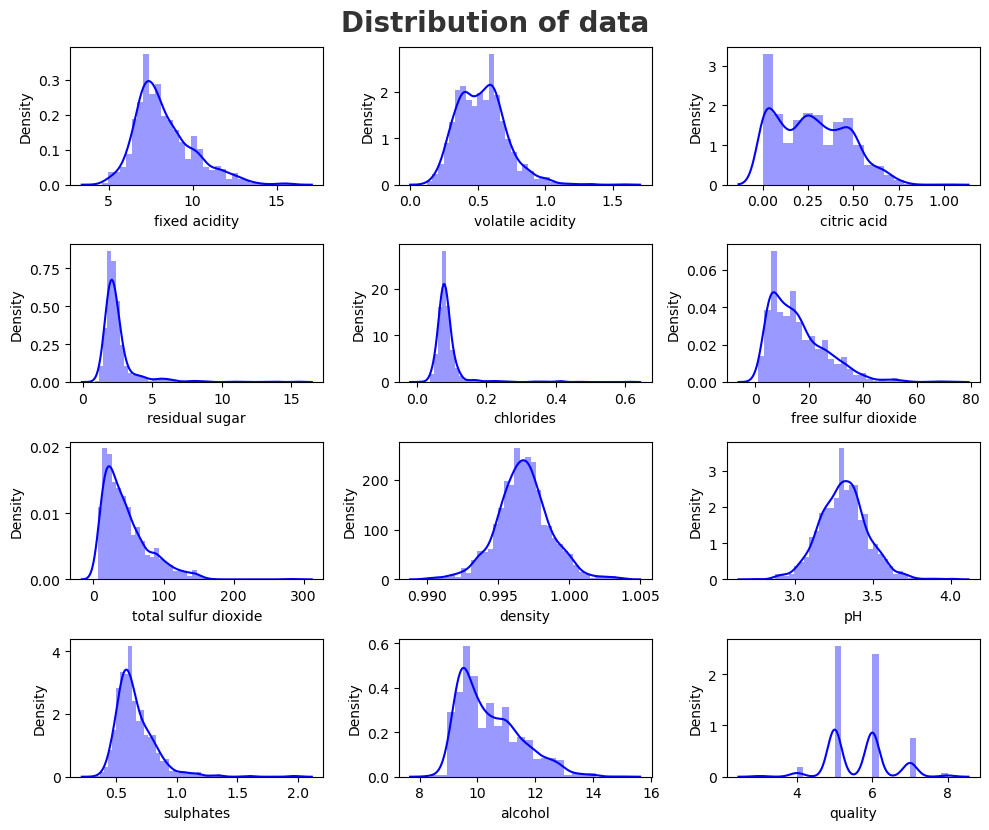

In [9]:
# data distribution for every feature
plt.figure(figsize=(10, 10))
plt.suptitle('Distribution of data', fontsize=20, fontweight='bold', alpha=0.8)
plot=1
for column in data:
    if plot<=12:
        plt.subplot(5, 3, plot)
        sns.distplot(data[column], color='b')
        plt.xlabel(column)
        plt.tight_layout()
    plot+=1

<AxesSubplot:>

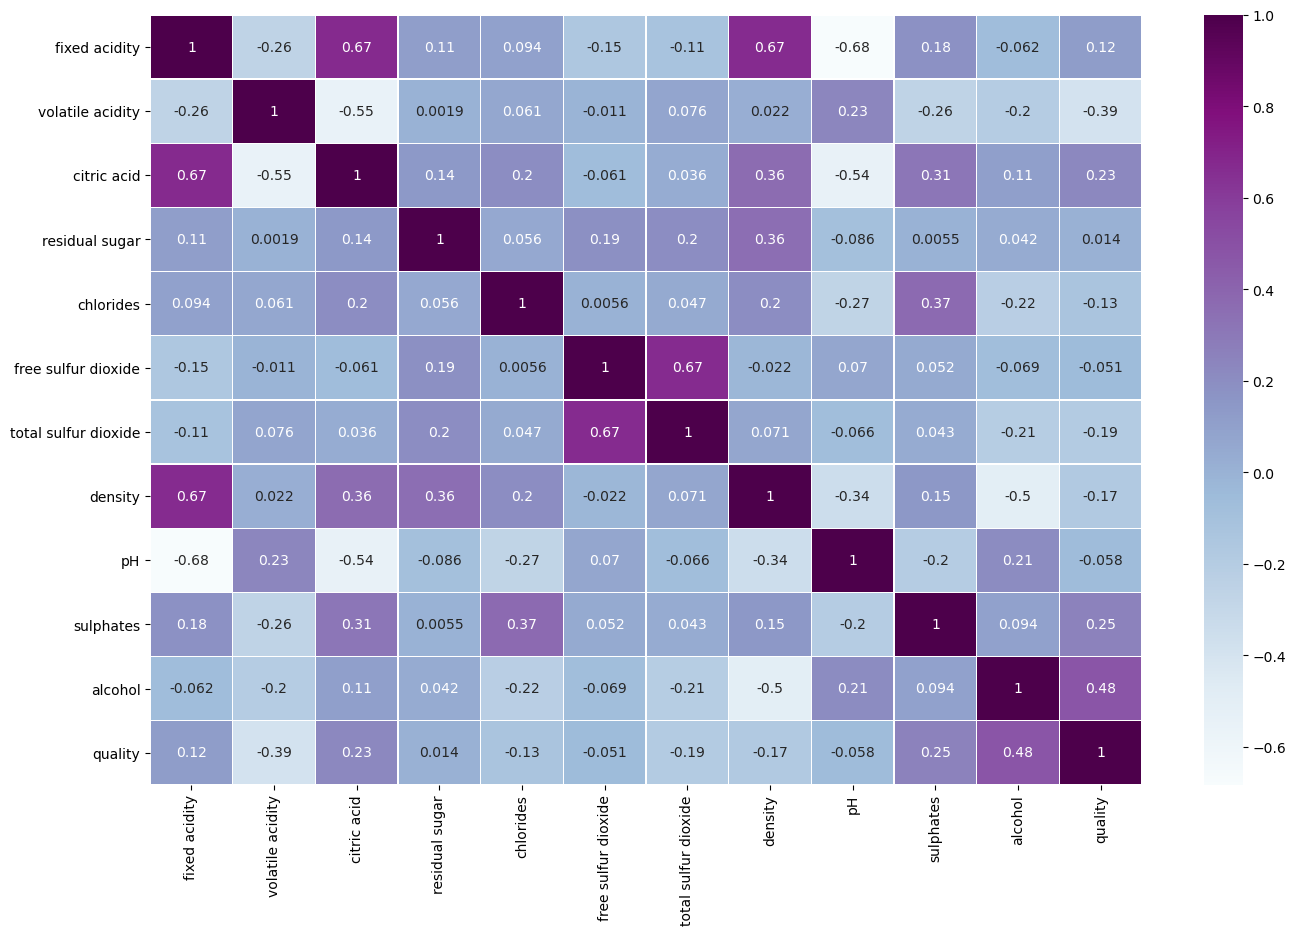

In [10]:
## Checking Correlation 
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True,cmap='BuPu',linewidths=0.2) 

## Independent Features

In [11]:
X=data.drop("quality",axis=1)

In [12]:
X.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


## Dependent Feature

In [13]:
y=data["quality"]

In [14]:
y.head(5)

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

## Splitting the Dataset into Training and Testing Dataset

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
X_train.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
548,12.4,0.350,0.49,2.6,0.079,27.0,69.0,0.99940,3.12,0.75,10.4
355,6.7,0.750,0.01,2.4,0.078,17.0,32.0,0.99550,3.55,0.61,12.8
1296,6.6,0.630,0.00,4.3,0.093,51.0,77.5,0.99558,3.20,0.45,9.5
209,11.0,0.300,0.58,2.1,0.054,7.0,19.0,0.99800,3.31,0.88,10.5
140,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.99650,3.19,0.82,9.6


In [17]:
y_train.head(5)

548     6
355     6
1296    5
209     7
140     5
Name: quality, dtype: int64

## Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Support Vector Classifier Model 

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# train the model and fit on training dataset
model = SVC()
model.fit(X_train, y_train)
  
# print prediction results
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))

0.5984848484848485


## Observation:
- Accuracy of the model is 59%

## Applying Grid Search CV for better Accuracy

In [21]:
from sklearn.model_selection import GridSearchCV
  
# defining parameters
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [22]:
# best parameter after tuning
print(grid.best_params_)


{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [23]:
#prediction after tuning
grid_predictions = grid.predict(X_test)

In [24]:
print(accuracy_score(y_test, grid_predictions))

0.6287878787878788


## Observation:
- Here after hyper parameter tuning the accuracy of the model is 62%